In [6]:
import random
import matplotlib.pyplot as plt
import statistics

In [7]:

def addzeros(a,num=20):
    anslist=[]
    anslist=[0]*num+a+[0]*num
    return anslist

def getstdev(inlist,interval=3):
    anslist=[]
    for i in range(len(inlist)-interval+1):
        inter=inlist[i:i+interval]
        
        anslist.append(statistics.stdev(inter))
    return anslist

def functionf(inlist,interval=3):
    anslist=[]
    for i in range(len(inlist)-interval+1):
        inter=inlist[i:i+interval]

        ans=2*statistics.median(inter)-max(inter)-min(inter)
        
        anslist.append(ans)
    return anslist

def stepfunction(x,c):
    if x<c:
        return 1
    else:
        return 0
def listsub(a,b):
    ans=[]
    for i in range(len(a)):
        ans.append(a[i]-b[i])
    return ans

def register(inlist,interval=3):
    anslist=[]
    for i in range(interval-1):
        anslist.append(inlist[0])
    for i in range(len(inlist)-interval+1):
        inter=inlist[i:i+interval]
        ans=sum(inter)/interval
        anslist.append(ans)
    
    return anslist



aa=[1,2,3,4,5,6]
print(register(aa))



[1, 1, 2.0, 3.0, 4.0, 5.0]


<function matplotlib.pyplot.show(close=None, block=None)>

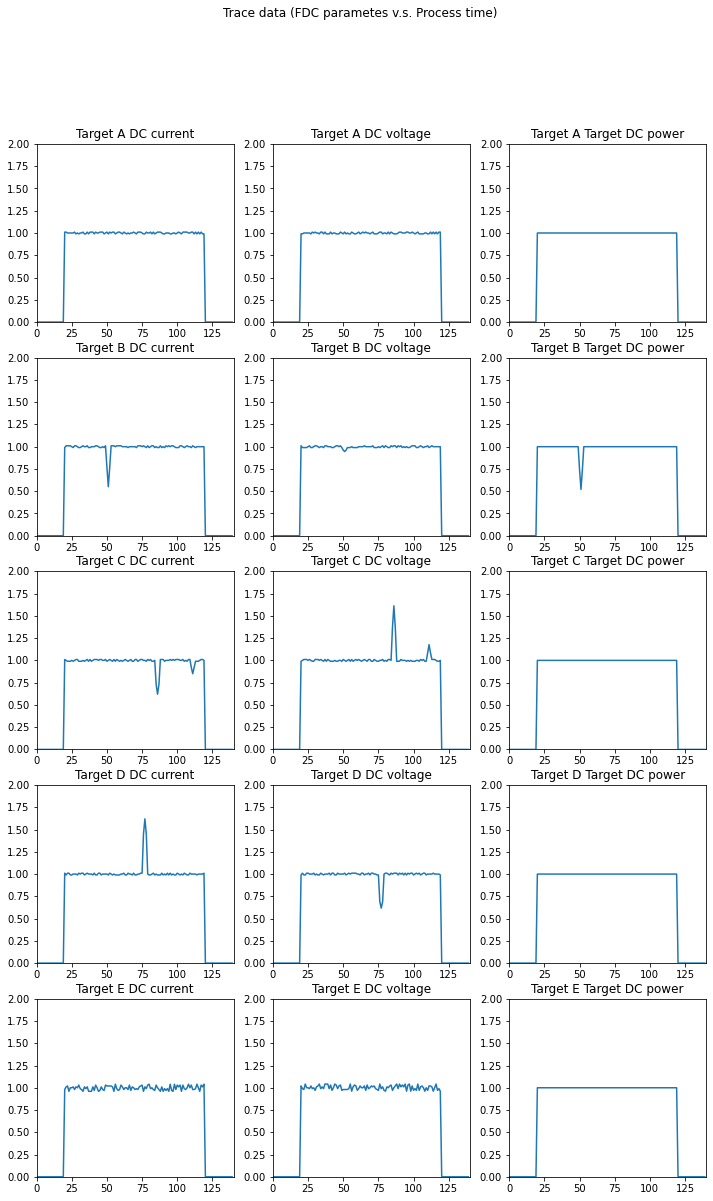

In [8]:
# this is the trance data consturction area
patterns ={'A':0,'B':0,'C':0,'D':0,'E':0}
patterns['A']=[[],[0]*100,[]]
patterns['B']=[[],[0]*100,[]]
patterns['C']=[[],[0]*100,[]]
patterns['D']=[[],[0]*100,[]]
patterns['E']=[[],[0]*100,[]]

#construct the A pattern:

for j in range(100):
    patterns['A'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['A'][2].append(1)

for i in range(len(patterns['A'][0])):
        patterns['A'][1][i]=patterns['A'][2][i]/patterns['A'][0][i]

#constuct the B pattern:
for j in range(100):
    patterns['B'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['B'][2].append(1)

patterns['B'][0][30]=0.77
patterns['B'][0][31]=0.55
patterns['B'][0][32]=0.77

patterns['B'][2][30]=0.74
patterns['B'][2][31]=0.52
patterns['B'][2][32]=0.74

for i in range(len(patterns['B'][0])):
    if(patterns['B'][0][i] == 0):
        patterns['B'][1][i]=0
    else :
        patterns['B'][1][i]=patterns['B'][2][i]/patterns['B'][0][i]

#construct the C pattern

for j in range(100):
    patterns['C'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['C'][2].append(1)

patterns['C'][0][65]=0.73
patterns['C'][0][66]=0.62
patterns['C'][0][67]=0.73
patterns['C'][0][90]=0.92
patterns['C'][0][91]=0.85
patterns['C'][0][92]=0.92

for i in range(len(patterns['C'][0])):
    if(patterns['C'][0][i] == 0):
        patterns['C'][1][i]=0
    else :
        patterns['C'][1][i]=patterns['C'][2][i]/patterns['C'][0][i]

#construct the D pattern

for j in range(100):
    patterns['D'][0].append(random.randint(99,101)/100)

for i in range(100):
    patterns['D'][2].append(1)

patterns['D'][0][56]=1.45
patterns['D'][0][57]=1.62
patterns['D'][0][58]=1.45

for i in range(len(patterns['C'][0])):
    if(patterns['D'][0][i] == 0):
        patterns['D'][1][i]=0
    else :
        patterns['D'][1][i]=patterns['D'][2][i]/patterns['D'][0][i]

#construct the E pattern:

for j in range(100):
    patterns['E'][0].append(random.randint(96,104)/100)

for i in range(100):
    patterns['E'][2].append(1)

for i in range(len(patterns['E'][0])):
        patterns['E'][1][i]=patterns['E'][2][i]/patterns['E'][0][i]


figure, axis = plt.subplots(5,3)
indextoalpha=['A','B','C','D','E']
for i in range(5):
    axis[i,0].plot(addzeros(patterns[indextoalpha[i]][0]))
    axis[i,0].axis([0,140,0,2])
    axis[i,0].set_title("Target "+indextoalpha[i]+" DC current")


    axis[i,1].plot(addzeros(patterns[indextoalpha[i]][1]))
    axis[i,1].axis([0,140,0,2])
    axis[i,1].set_title("Target "+indextoalpha[i]+" DC voltage")
    axis[i,2].plot(addzeros(patterns[indextoalpha[i]][2]))
    axis[i,2].axis([0,140,0,2])
    axis[i,2].set_title("Target "+indextoalpha[i]+" Target DC power")


figure.set_size_inches(12,19)
figure.suptitle('Trace data (FDC parametes v.s. Process time)')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

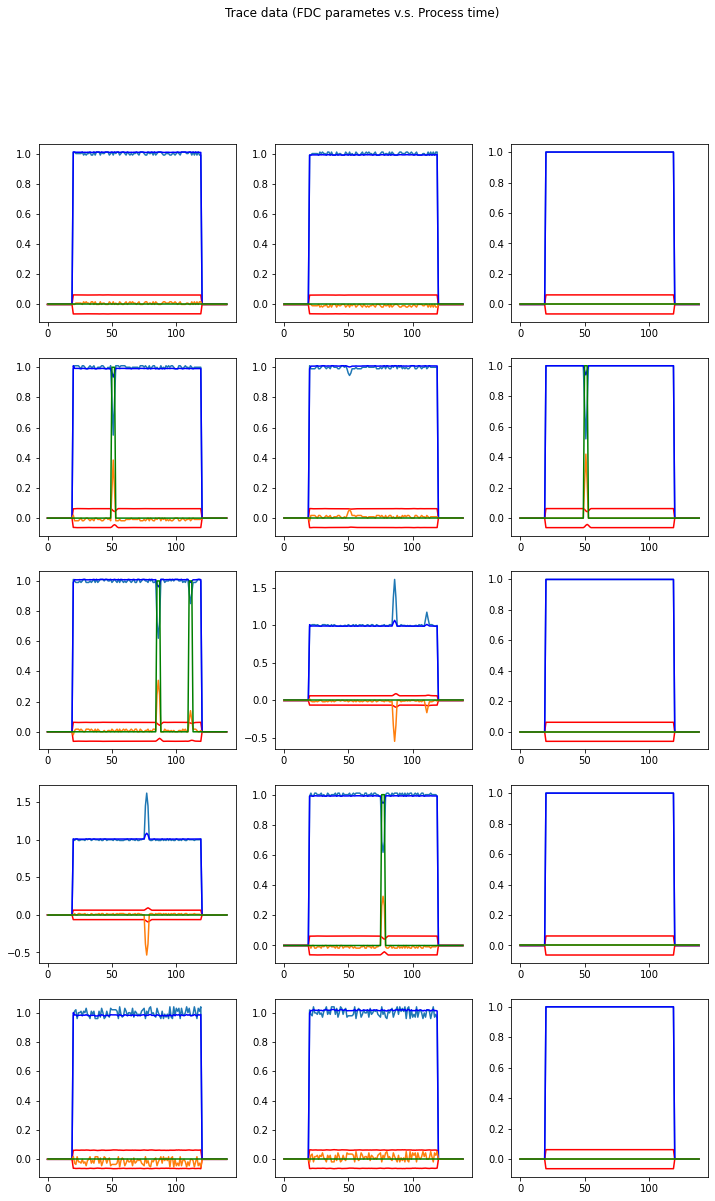

In [9]:
figure, axis = plt.subplots(5,3)
for i in range(5):
    for j in range(3):
        axis[i,j].plot(addzeros(patterns[indextoalpha[i]][j]))
        target0=patterns[indextoalpha[i]][j]
        exp0=[]
        num0=0
        for k in range(len(target0)):
            if k ==0 :
                exp0.append(target0[i])
                num0 = target0[k]
            else:
                exp0.append(0.125*target0[k]+num0*0.875)
        
        
        

        new=register(target0)
        new1=[-x/16 for x in new]
        new2=[x/16 for x in new]
        

        judger=[]
        ora=listsub(exp0,target0)
        for t in range(100):
            
            if ora[t] >0 and ora[t]> new2[t]:
                judger.append(1)
            # elif ora[t] <0 and ora[t]<new1[t]:
            #     judger.append(1)
            else:
                judger.append(0)

        axis[i,j].plot(addzeros(new1),'r')
        axis[i,j].plot(addzeros(new2),'r')
        axis[i,j].plot(addzeros(exp0),'b')
        axis[i,j].plot(addzeros(listsub(exp0,target0)))
        axis[i,j].plot(addzeros(judger),'g')
       
figure.set_size_inches(12,19)
figure.suptitle('Trace data (FDC parametes v.s. Process time)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

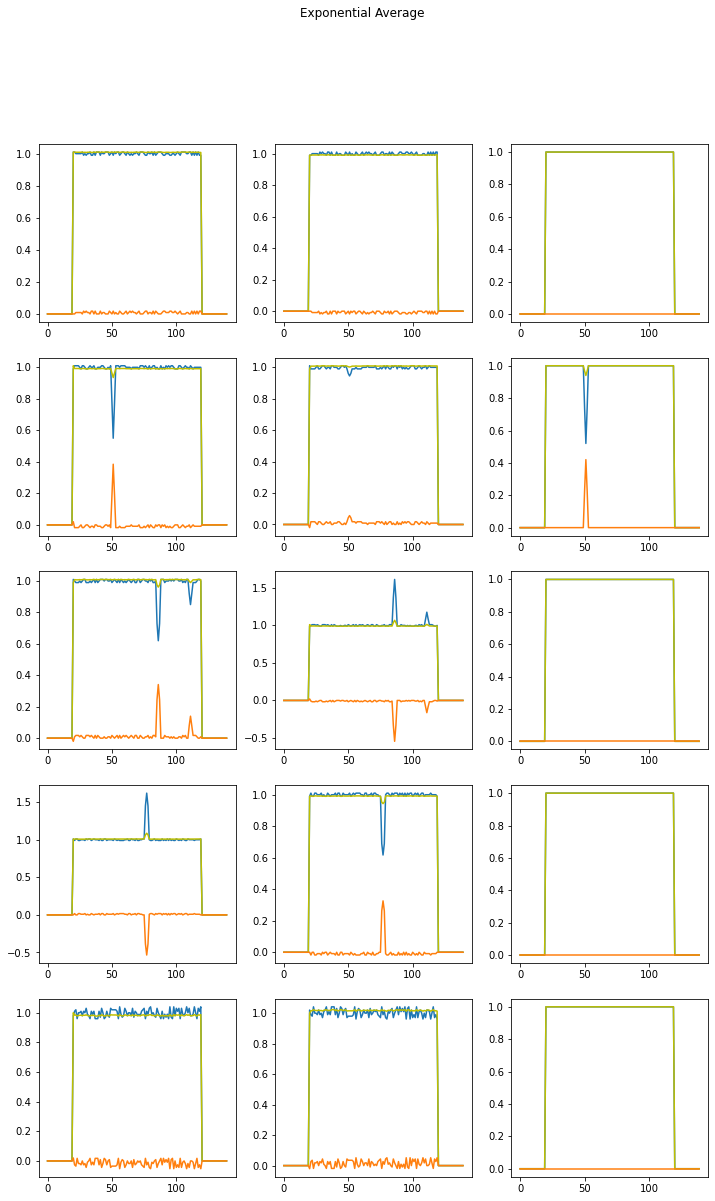

In [20]:
figure, axis = plt.subplots(5,3)
for i in range(5):
    for j in range(3):
        axis[i,j].plot(addzeros(patterns[indextoalpha[i]][j]))
        target0=patterns[indextoalpha[i]][j]
        exp0=[]
        num0=0
        for k in range(len(target0)):
            if k ==0 :
                exp0.append(target0[i])
                num0 = target0[k]
            else:
                exp0.append(0.125*target0[k]+num0*0.875)
        
        
        

        new=register(target0)
        new1=[-x/16 for x in new]
        new2=[x/16 for x in new]
        

        judger=[]
        ora=listsub(exp0,target0)
        for t in range(100):
            
            if ora[t] >0 and ora[t]> new2[t]:
                judger.append(1)
            # elif ora[t] <0 and ora[t]<new1[t]:
            #     judger.append(1)
            else:
                judger.append(0)


        axis[i,j].plot(addzeros(exp0),'y',ls='-')
        axis[i,j].plot(addzeros(listsub(exp0,target0)))

       
figure.set_size_inches(12,19)
figure.suptitle('Exponential Average')
plt.show

